# Imports

In [1]:
# Import the required libraries 
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

Using TensorFlow backend.


## Processing Dataset

In [2]:
text_dir = 'D:\\Tu Beo\\Education\\FoodVisor\\data\\UPMC_Food101\\texts_test_txt'

In [3]:
all_texts = datasets.load_files(text_dir, 
            description=None, categories=None, load_content=True, shuffle=False, 
                                        encoding='utf-8', decode_error='strict', random_state=0)

In [4]:
all_texts.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [5]:
all_texts.filenames[:5]

array(['D:\\Tu Beo\\Education\\FoodVisor\\data\\UPMC_Food101\\texts_test_txt\\apple_pie\\apple_pie_181.txt',
       'D:\\Tu Beo\\Education\\FoodVisor\\data\\UPMC_Food101\\texts_test_txt\\baklava\\baklava_636.txt',
       'D:\\Tu Beo\\Education\\FoodVisor\\data\\UPMC_Food101\\texts_test_txt\\apple_pie\\apple_pie_573.txt',
       'D:\\Tu Beo\\Education\\FoodVisor\\data\\UPMC_Food101\\texts_test_txt\\apple_pie\\apple_pie_493.txt',
       'D:\\Tu Beo\\Education\\FoodVisor\\data\\UPMC_Food101\\texts_test_txt\\apple_pie\\apple_pie_203.txt'],
      dtype='<U100')

In [6]:
all_texts.target_names[:5]

['apple_pie', 'baby_back_ribs', 'baklava']

In [7]:
all_texts.target[:5]

array([0, 2, 0, 0, 0])

## Preprocessing words

In [8]:
all_docs = all_texts.data

In [9]:
type(all_docs)

list

In [10]:
len(all_docs)

2635

In [13]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem import PorterStemmer

In [14]:
stop_words = set(stopwords.words('english')) 
porter = PorterStemmer()

In [200]:
%%time
proc_docs = []

for doc in all_docs:
    word_tokens = word_tokenize(doc) 
    processed = [w for w in word_tokens if not w in stop_words]
    processed = [porter.stem(w) for w in word_tokens]
    proc_docs.append(processed)

Wall time: 3min 2s


In [18]:
vocab = dict()
for doc in proc_docs:
    for w in doc :
        vocab[w] = vocab.get(w, 0) + 1

In [202]:
vocab_doc = dict()
for doc in proc_docs:
    doc = set(doc)
    for w in doc :
        vocab_doc[w] = vocab_doc.get(w, 0) + 1

In [201]:
vocab['recip']

67312

In [203]:
vocab_doc['recip']

2554

In [206]:
len(vocab)

78244

In [207]:
len(vocab_doc)

78244

In [50]:
def top_words(count, get = 20, reverse=True) :
    c = 0
    for w in sorted(count, key=count.get, reverse=reverse):
        c += 1
        if c > get :
            break
        print(w,": ", count[w])

In [48]:
def slice_words(count, below, top) :
    """
    Remove words that occur less than (and more than) a number of time  \n
    and return the removed words.
    """
    c = 0
    removed_words = []
    # bottom up
    for w in sorted(count, key=count.get, reverse=False):
        if count[w] < below :
            c += 1
            removed_words.append(w)
            # print(w,": ", count[w])
        else:
            break
    # top down
    for w in sorted(count, key=count.get, reverse=True):
        if count[w] > top :
            c += 1
            removed_words.append(w)
            # print(w,": ", count[w])
        else:
            break
    print(c, " words to be removed.")
    return removed_words

In [205]:
top_words(vocab_doc,500)

# :  2573
. :  2573
to :  2568
, :  2566
the :  2560
and :  2560
recip :  2554
a :  2543
of :  2536
: :  2528
for :  2527
with :  2526
* :  2505
in :  2483
( :  2472
) :  2472
on :  2457
you :  2436
about :  2396
thi :  2373
1 :  2362
all :  2347
from :  2316
your :  2312
is :  2299
or :  2278
2 :  2259
! :  2257
by :  2224
use :  2222
's :  2216
make :  2183
more :  2177
it :  2168
home :  2151
** :  2127
cook :  2119
& :  2110
are :  2104
food :  2090
3 :  2086
ingredi :  2079
at :  2044
4 :  2012
be :  1984
? :  1972
bake :  1936
top :  1935
5 :  1933
minut :  1930
sugar :  1926
that :  1917
time :  1913
contact :  1906
dessert :  1903
have :  1889
like :  1880
not :  1868
I :  1862
can :  1851
up :  1847
will :  1845
serv :  1837
get :  1824
add :  1808
over :  1807
out :  1799
email :  1797
one :  1791
cup :  1788
2014 :  1774
into :  1768
comment :  1761
until :  1757
post :  1737
10 :  1731
new :  1724
easi :  1722
our :  1718
right :  1716
6 :  1712
an :  1711
as :  1690
how : 

In [208]:
top_words(vocab_doc,50,reverse =False)

cheddar-al :  1
23/14 :  1
motivation-encourag :  1
16/14 :  1
/wp-content/uploads/2012/04/iaoj.blogbtn.png :  1
calendars/plann :  1
recipes-slow :  1
30/14 :  1
recipes-allergi :  1
travel/auto :  1
//orgjunkie.com :  1
susan- :  1
infomedia :  1
expedi :  1
mighty… :  1
05/23/14 :  1
molas :  1
karimcge :  1
1,714 :  1
mins/ :  1
three-onion :  1
2.88 :  1
1.5-ounc :  1
27.13 :  1
6.69 :  1
8.97 :  1
5.59 :  1
3.72 :  1
billington :  1
7.18 :  1
1.96 :  1
aromatica :  1
1.81 :  1
jitteri :  1
injury-fre :  1
fetter :  1
thapoung :  1
narin :  1
fitbi :  1
kumai :  1
blueberry-flavor :  1
womenshealthmag :  1
keibler :  1
fwb :  1
volo :  1
aleisha :  1
presumpt :  1
rock-solid :  1
pocketbook-friendli :  1
WH :  1


In [213]:
removed_words = slice_words(vocab, 15,40000)

68642  words to be removed.


In [212]:
removed_words_2 = slice_words(vocab_doc, 15,2000)

70364  words to be removed.


In [214]:
len(set(removed_words).intersection(set(removed_words_2)))

68638

In [215]:
new_stop_words = stop_words.union(set(removed_words)).union(set(removed_words_2))

In [219]:
%%time
new_proc_docs = []

for doc in proc_docs:
    processed = [w for w in doc if not w in new_stop_words]
    new_proc_docs.append(processed)

Wall time: 1.04 s


In [220]:
len(new_proc_docs)

2635

In [67]:
def words_count(corps):
    dic = {}
    for doc in corps:
        for w in doc :
            dic[w] = dic.get(w, 0) + 1
    return dic

In [221]:
new_vocab = words_count(new_proc_docs)

In [218]:
len(new_vocab)

12083

In [222]:
len(new_vocab)

7774

In [223]:
top_words(new_vocab, reverse = False)

peev :  15
delish.com :  15
juicier :  15
15. :  15
10:09 :  15
9:17 :  15
10:25 :  15
272 :  15
296 :  15
317 :  15
sudden :  15
344 :  15
345 :  15
352 :  15
354 :  15
374 :  15
384 :  15
4:33 :  15
391 :  15
405 :  15


In [224]:
new_proc_texts = []
for doc in new_proc_docs:
    new_proc_texts.append(" ".join(doc))

In [225]:
" ".join(new_proc_docs[0])

"contact Us advertis newslett crock-pot faq store link parti appet beverag bread breakfast dessert dip entre freezer meal sauc side dish soup stew blog announc blog hop freebi giveaway tip trick index box shop list meal planner crock-pot appl pie moonshin By ladi kati novemb 25 2013 In beverag christma thanksgiv 10+ serv ~ 8 hour » categori » beverag » crock-pot appl pie moonshin tradit christma eve beverag husband famili hi grandfath ha made mix drink year men sit basement laugh joke sip drink It also given adult gift savor year long onc open keep refriger drink cold better way last year longer pleas rememb adult beverag strong If care proof valu everclear vodka instead get tast less alcohol everclear 195 proof alcohol 95 % find liquor store local groceri sell If find anoth brand 100 proof clear liquor vodka crock-pot cherri pie moonshin lemonad moonshin print crock-pot appl pie moonshin gallon appl cider liter everclear alcohol cinnamon stick instruct add appl cider cinnamon stick cr

## ---------------------------------------

In [226]:
text_train,text_test , y_train, y_test = train_test_split(
    new_proc_texts, all_texts.target, test_size=0.33, random_state=42)

In [227]:
# Feature Engineering 
print ("TF-IDF on text data ... ")
tfidf = TfidfVectorizer(binary=True)
X_train = tfidf.fit_transform(text_train)
#.astype('float16')
X_test = tfidf.transform(text_test)
#.astype('float16')
print ("Done ! ")

TF-IDF on text data ... 
Done ! 


In [228]:
X_train.shape

(1765, 6622)

In [230]:
train_size, num_words = X_train.shape
num_classes = len(all_texts.target_names)

In [231]:
test_size,_ = X_test.shape

## Keras model

In [232]:
from keras import models

# Build neural network
model = models.Sequential()
model.add(Dense(256, input_dim=num_words, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(160, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(120, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))

# Compile model
model.compile(optimizer='adam',
              #loss='categorical_crossentropy',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          #batch_size=128,
          epochs=50,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1765 samples, validate on 870 samples
Epoch 1/50
1765/1765 [==============================] - 5s 3ms/step - loss: 0.8565 - acc: 0.5501 - val_loss: 0.2846 - val_acc: 0.9000
Epoch 2/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.1467 - acc: 0.9552 - val_loss: 0.1358 - val_acc: 0.9540
Epoch 3/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.0806 - acc: 0.9739 - val_loss: 0.1765 - val_acc: 0.9425
Epoch 4/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.0486 - acc: 0.9858 - val_loss: 0.1938 - val_acc: 0.9517
Epoch 5/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.0397 - acc: 0.9875 - val_loss: 0.1634 - val_acc: 0.9494
Epoch 6/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.0462 - acc: 0.9830 - val_loss: 0.2481 - val_acc: 0.9333
Epoch 7/50
1765/1765 [==============================] - 4s 2ms/step - loss: 0.0402 - acc: 0.9875 - val_loss: 0.2778 - val_acc: 0.9264
Epoch 8/50
1765

KeyboardInterrupt: 

## Torch model

In [ ]:
use_gpu = torch.cuda.is_available()
print('Using gpu: %s ' % use_gpu)

In [88]:
use_gpu = False

In [90]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

In [165]:
criterion = nn.CrossEntropyLoss()

In [139]:
class myNet2(nn.Module):
    def __init__(self, input_size, num_classes):
        super(myNet2, self).__init__()
        self.classifier = nn.Sequential(
            nn.Linear(input_size, 256),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(256, 200),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(200, 160),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(160, 120),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(120, 80),
            nn.ReLU(True),
            nn.Dropout(0.3),
            nn.Linear(80, num_classes),
        ) 

    def forward(self, x):
        x = self.classifier(x)
        return x

In [192]:
net2 = myNet2(num_words, num_classes)
optimizer2 = optim.Adam(net2.parameters())

In [130]:
print(net2)

myNet2(
  (classifier): Sequential(
    (0): Linear(in_features=10063, out_features=256, bias=True)
    (1): ReLU(inplace)
    (2): Dropout(p=0.3)
    (3): Linear(in_features=256, out_features=200, bias=True)
    (4): ReLU(inplace)
    (5): Dropout(p=0.3)
    (6): Linear(in_features=200, out_features=160, bias=True)
    (7): ReLU(inplace)
    (8): Dropout(p=0.3)
    (9): Linear(in_features=160, out_features=120, bias=True)
    (10): ReLU(inplace)
    (11): Dropout(p=0.3)
    (12): Linear(in_features=120, out_features=80, bias=True)
    (13): ReLU(inplace)
    (14): Dropout(p=0.3)
    (15): Linear(in_features=80, out_features=3, bias=True)
  )
)


In [166]:
class OurNet(nn.Module):
    def __init__(self, n_inputs, hidden_size, num_classes):
        super(OurNet, self).__init__()
        self.layer_1 = nn.Linear(n_inputs,hidden_size, bias=True)
        self.relu = nn.ReLU()
        self.layer_2 = nn.Linear(hidden_size, hidden_size, bias=True)
        self.output_layer = nn.Linear(hidden_size, num_classes, bias=True)

    def forward(self, x):
        out = self.layer_1(x)
        out = self.relu(out)
        out = self.layer_2(out)
        out = self.relu(out)
        out = self.output_layer(out)
        return out

In [188]:
net3 = OurNet(num_words, 100, num_classes)
#ouroptimizer = optim.SGD(net3.parameters(), lr=0.01)
ouroptimizer = optim.Adam(net3.parameters())

In [ ]:
if use_gpu:
    net3 = net3.cuda()

### Creating Data generator

In [94]:
def data_gen(data,labels,batch_size=64,shuffle=True):
    labels = np.array(labels)
    if shuffle:
        index = np.random.permutation(len(data))
        data = data[index]
        labels = labels[index]
    for idx in range(0,len(data),batch_size):
        yield(data[idx:idx+batch_size],labels[idx:idx+batch_size])

In [185]:
def train_model(model,
                train_data=None,train_labels=None, 
                test_data = None, test_labels = None,
                epochs=1, batch_size = 128,
                optimizer=None,criterion=None ,
                train=True,
                shuffle=True ):
    
    if train:
        loss_history = []
        acc_history = []
        val_loss_history = []
        val_acc_history = []
        
        model.train()
    else:
        model.eval()
        
    if train :
        for epoch in range(epochs):
            #================TRAINING=====================#
            batches = data_gen(data=train_data,labels=train_labels,batch_size = batch_size,shuffle=shuffle)

            running_loss = 0.0
            running_corrects = 0
            
            for inputs,classes in batches:
                if use_gpu:
                    inputs , classes = torch.from_numpy(inputs).float().cuda(), torch.from_numpy(classes).long().cuda()
                else:
                    inputs , classes = torch.from_numpy(inputs).float(), torch.from_numpy(classes).long()

                inputs = inputs.view(inputs.size(0), -1)
                outputs = model(inputs)
                loss = criterion(outputs,classes)
                
                if optimizer is None:
                    raise ValueError('Pass optimizer for train mode')
                    
                optimizer = optimizer
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()
                _,preds = torch.max(outputs.data,1)
                # statistics
                #print(loss)
                running_loss += loss.data.item()
                running_corrects += torch.sum(preds == classes.data)
                
            train_size = len(train_labels)
            
            epoch_loss = running_loss / train_size
            epoch_acc = running_corrects.data.item() / train_size
            #print('Epoch: {:d} Loss: {:.4f} Acc: {:.4f}'.format(
            #             epoch, epoch_loss, epoch_acc))

            loss_history.append(epoch_loss)
            acc_history.append(epoch_acc)
            
            #================VALIDATING===================#
            batches = data_gen(data=test_data,labels=test_labels,shuffle=shuffle)

            running_loss = 0.0
            running_corrects = 0
            
            for inputs,classes in batches:
                if use_gpu:
                    inputs , classes = torch.from_numpy(inputs).cuda(), torch.from_numpy(classes).cuda()
                else:
                    inputs , classes = Variable(torch.from_numpy(inputs).float()), Variable(torch.from_numpy(classes).long())

                inputs = inputs.view(inputs.size(0), -1)
                outputs = model(inputs)
                loss = criterion(outputs,classes)           
                _,preds = torch.max(outputs.data,1)
                # statistics
                #print(loss)
                running_loss += loss.data.item()
                running_corrects += torch.sum(preds == classes.data)
                
            test_size = len(test_labels)    
                
            test_epoch_loss = running_loss / test_size
            test_epoch_acc = running_corrects.data.item() / test_size
            
            val_loss_history.append(test_epoch_loss)
            val_acc_history.append(test_epoch_acc)
            
            print('Epoch: {:d} Loss: {:.4f} Acc: {:.4f} -- Test Loss: {:.4f} Test Acc: {:.4f}'.format(
                     epoch, epoch_loss, epoch_acc, test_epoch_loss, test_epoch_acc))
            
        return loss_history,acc_history,val_loss_history,val_acc_history
            
    else :
        batches = data_gen(data=test_data,labels=test_labels,shuffle=shuffle)

        running_loss = 0.0
        running_corrects = 0

        for inputs,classes in batches:
            if use_gpu:
                inputs , classes = torch.from_numpy(inputs).cuda(), torch.from_numpy(classes).cuda()
            else:
                inputs , classes = Variable(torch.from_numpy(inputs).float()), Variable(torch.from_numpy(classes).long())

            inputs = inputs.view(inputs.size(0), -1)
            outputs = model(inputs)
            loss = criterion(outputs,classes)           
            _,preds = torch.max(outputs.data,1)
            # statistics
            #print(loss)
            running_loss += loss.data.item()
            running_corrects += torch.sum(preds == classes.data)

        test_size = len(test_labels)    

        test_epoch_loss = running_loss / test_size
        test_epoch_acc = running_corrects.data.item() / test_size
            
        print('Test Loss: {:.4f} Test Acc: {:.4f}'.format(
                     test_epoch_loss, test_epoch_acc))
        
        return

In [193]:
%%time
history = train_model(net2,
                train_data=X_train.toarray(),train_labels=y_train, 
                test_data = X_test.toarray(), test_labels = y_test,
                epochs=100, batch_size = 128,
                optimizer=optimizer2,criterion=criterion ,
                train=True,
                shuffle=True )
print("DONE !")

Epoch: 0 Loss: 0.0086 Acc: 0.3864 -- Test Loss: 0.0173 Test Acc: 0.3563
Epoch: 1 Loss: 0.0074 Acc: 0.5037 -- Test Loss: 0.0127 Test Acc: 0.6598
Epoch: 2 Loss: 0.0034 Acc: 0.8544 -- Test Loss: 0.0048 Test Acc: 0.8966
Epoch: 3 Loss: 0.0008 Acc: 0.9666 -- Test Loss: 0.0041 Test Acc: 0.9322
Epoch: 4 Loss: 0.0005 Acc: 0.9802 -- Test Loss: 0.0045 Test Acc: 0.9299
Epoch: 5 Loss: 0.0003 Acc: 0.9887 -- Test Loss: 0.0042 Test Acc: 0.9310
Epoch: 6 Loss: 0.0003 Acc: 0.9881 -- Test Loss: 0.0034 Test Acc: 0.9425
Epoch: 7 Loss: 0.0003 Acc: 0.9887 -- Test Loss: 0.0039 Test Acc: 0.9368
Epoch: 8 Loss: 0.0002 Acc: 0.9915 -- Test Loss: 0.0031 Test Acc: 0.9529
Epoch: 9 Loss: 0.0002 Acc: 0.9915 -- Test Loss: 0.0029 Test Acc: 0.9552
Epoch: 10 Loss: 0.0002 Acc: 0.9898 -- Test Loss: 0.0030 Test Acc: 0.9540
Epoch: 11 Loss: 0.0002 Acc: 0.9909 -- Test Loss: 0.0044 Test Acc: 0.9483
Epoch: 12 Loss: 0.0002 Acc: 0.9915 -- Test Loss: 0.0034 Test Acc: 0.9448
Epoch: 13 Loss: 0.0002 Acc: 0.9926 -- Test Loss: 0.0031 Test 

In [178]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Accuracy history')

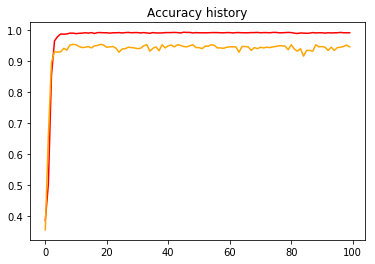

In [194]:
plt.plot(history[1], color ='red')
plt.plot(history[3], color ='orange')
plt.plot()
plt.title("Accuracy history")

Text(0.5, 1.0, 'Loss history')

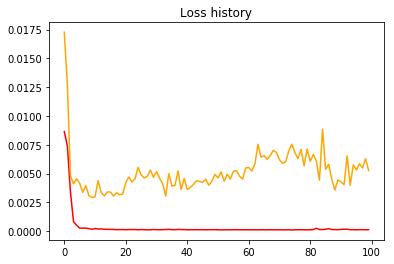

In [195]:
plt.plot(history[0], color ='red')
plt.plot(history[2], color ='orange')
plt.plot()
plt.title("Loss history")

In [199]:
%%time
train_model(net2,
               # train_data=X_train.toarray(),train_labels=y_train, 
                test_data = X_test.toarray(), test_labels = y_test,
                #epochs=100, batch_size = 128,
                #optimizer=optimizer2,
            criterion=criterion ,
                train=False,
                #shuffle=True 
           )

Test Loss: 0.0056 Test Acc: 0.9506
Wall time: 349 ms


## Most informative words

In [83]:
from sklearn.svm import LinearSVC

In [233]:
clf = LinearSVC()
clf.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [234]:
print ("Predict on test data ... ")
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : ", accuracy)

Predict on test data ... 
Accuracy :  0.9689655172413794


In [86]:
def print_top10(vectorizer, clf, class_labels):
    """
    Prints features with the highest coefficient values, per class \n
    https://stackoverflow.com/questions/11116697/how-to-get-most-informative-features-for-scikit-learn-classifiers
    """
    feature_names = vectorizer.get_feature_names()
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("%s: %s" % (class_label,
              ", ".join(feature_names[j] for j in top10)))

In [235]:
print_top10(tfidf, clf, all_texts.target_names)

apple_pie: ha, granni, slice, cinnamon, peel, core, flour, crust, pie, appl
baby_back_ribs: meat, bbq, bone, tender, pork, pepper, back, barbecu, babi, rib
baklava: repeat, filo, honey, syrup, greek, walnut, nut, pistachio, phyllo, baklava
